## import packages and Excel file


In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import pdfkit
from pathlib import Path
from datetime import date
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from fpdf import FPDF 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Abdouch\Data analytics Projects\Portfolio\Movie industry Correlation in Python\movies.csv')
df.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Check messing data

In [112]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

df.head()

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Change data type

In [113]:
df.dtypes

df['budget']=df['budget'].astype('Int64')
df['gross']=df['gross'].astype('Int64')
df['votes']=df['votes'].astype('Int64')
df['runtime']=df['runtime'].astype('Int64')
df.dtypes

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


## Correct the year of movie released and separate the country of released movie

In [114]:
df[['year_of_released']] = df['released'].str.extract(r'(\d{4}) ')
df.head()

df.dtypes
df['year_of_released']=df['year_of_released'].astype('Int64')


df.dtypes

name                 object
rating               object
genre                object
year                  int64
released             object
score               float64
votes                 Int64
director             object
writer               object
star                 object
country              object
budget                Int64
gross                 Int64
company              object
runtime               Int64
year_of_released      Int64
dtype: object

## Order by Gross

In [115]:

df.sort_values(by='gross', inplace=True, ascending=False)
# pd.set_option('display.max_rows', None)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


## Remove Duplicates

In [116]:
# df.sort_values(by='company' ,ascending=False)
# duplicate_rows = df[df.duplicated()]

# # Display duplicate rows
# print("Duplicate Rows:")
# print(duplicate_rows)
# pd.reset_option('display.max_rows')
df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_released
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,<NA>,NaN,90,2020
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,<NA>,<NA>,Cactus Blue Entertainment,90,2020
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,<NA>,Embi Productions,<NA>,2020
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,<NA>,James Randall,James Randall,Christina Roz,United States,15000,<NA>,NaN,120,2020


## Drop unused colomns

In [117]:
# Specify the list of columns to drop
columns_to_drop = ['year', 'released']

# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

df.head()

,name,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,year_of_released
5445,Avatar,PG-13,Action,7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


## Reorder Colomns 

In [118]:
new_order = ['name', 'rating', 'genre', 'year_of_released', 'country' , 'score', 'votes', 'director', 'writer', 'star',  'budget', 'gross', 'company', 'runtime']

# Reorder the columns
df = df[new_order]

df.head()

,name,rating,genre,year_of_released,country,score,votes,director,writer,star,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,United States,7.8,1100000,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,United States,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,United States,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,United States,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,United States,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149


## Rename Colomns

In [119]:
df.rename(columns={'year_of_released': 'year'}, inplace=True)

df.head()

,name,rating,genre,year,country,score,votes,director,writer,star,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,United States,7.8,1100000,James Cameron,James Cameron,Sam Worthington,237000000,2847246203,Twentieth Century Fox,162
7445,Avengers: Endgame,PG-13,Action,2019,United States,8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,356000000,2797501328,Marvel Studios,181
3045,Titanic,PG-13,Drama,1997,United States,7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,200000000,2201647264,Twentieth Century Fox,194
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,United States,7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,245000000,2069521700,Lucasfilm,138
7244,Avengers: Infinity War,PG-13,Action,2018,United States,8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,321000000,2048359754,Marvel Studios,149


## Storing Updated Data

In [120]:


# df.to_csv('Movies_Cleaned.csv', index=False)


## Find Correlations 

<Axes: xlabel='gross', ylabel='budget'>

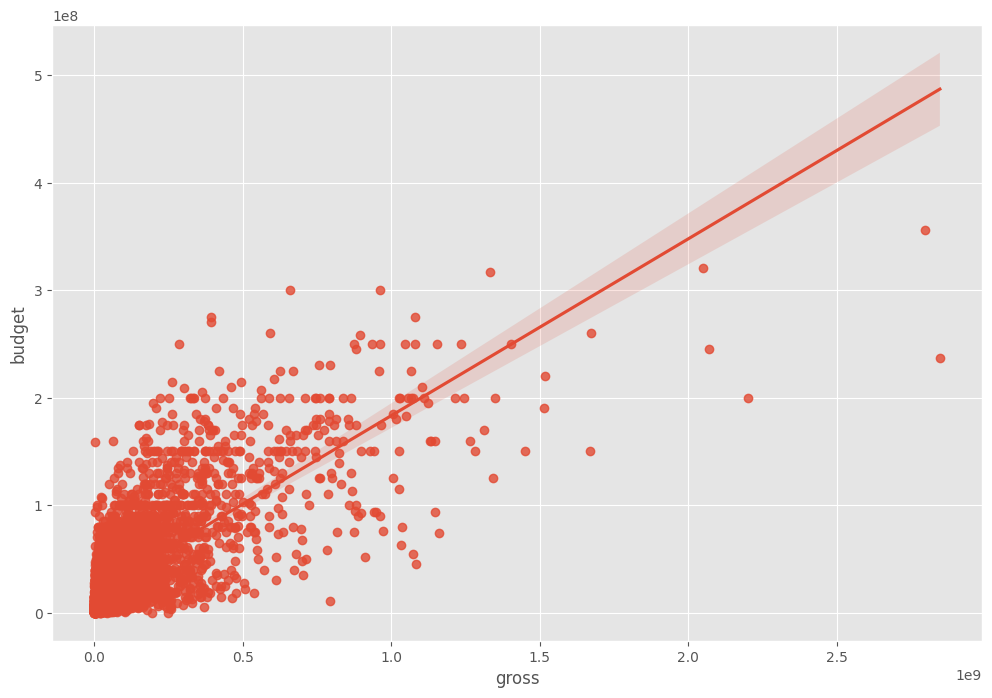

In [121]:
#order by gross
df= df.sort_values(by=['gross'], inplace=False, ascending=False)

#reg corr

sns.regplot(x="gross", y="budget", data=df)



In [122]:
# Exclude non-numeric columns from correlation calculation
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix for numeric columns
correlation_matrix = numeric_columns.corr(method ='pearson')
correlation_matrix

,year,score,votes,budget,gross,runtime
year,1.000000,0.105994,0.218429,0.321918,0.250514,0.120636
score,0.105994,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.218429,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.321918,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.250514,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120636,0.399451,0.309212,0.320447,0.245216,1.000000


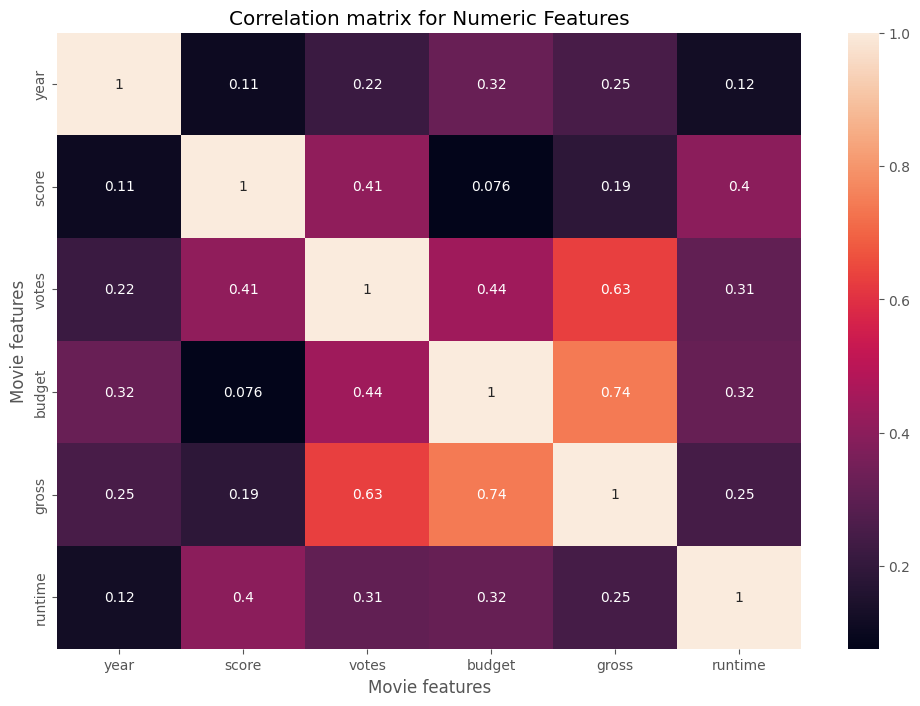

In [123]:
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [124]:
# Using factorize - this assigns a random numeric value for each unique categorical value

correlation_matrix.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.0,1.0,1.0,1.0,1.0,1.0
score,1.0,1.0,1.0,1.0,1.0,1.0
votes,1.0,1.0,1.0,1.0,1.0,1.0
budget,1.0,1.0,1.0,1.0,1.0,1.0
gross,1.0,1.0,1.0,1.0,1.0,1.0
runtime,1.0,1.0,1.0,1.0,1.0,1.0


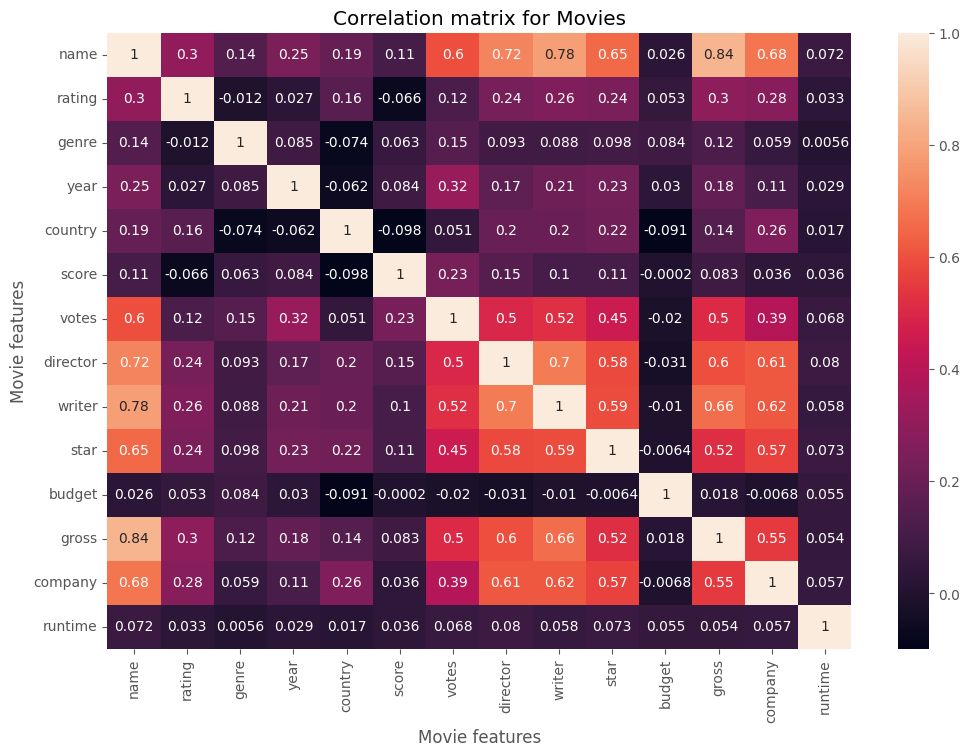

In [125]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [126]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

name     name       1.000000
         rating     0.303922
         genre      0.138277
         year       0.246515
         country    0.190609
                      ...   
runtime  star       0.072540
         budget     0.055318
         gross      0.054209
         company    0.056981
         runtime    1.000000
Length: 196, dtype: float64


In [127]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

country  score     -0.098456
score    country   -0.098456
country  budget    -0.091056
budget   country   -0.091056
genre    country   -0.073886
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 196, dtype: float64


In [128]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

votes     gross       0.504208
gross     votes       0.504208
star      gross       0.516135
gross     star        0.516135
votes     writer      0.521099
writer    votes       0.521099
gross     company     0.548719
company   gross       0.548719
star      company     0.569651
company   star        0.569651
director  star        0.580143
star      director    0.580143
writer    star        0.589925
star      writer      0.589925
votes     name        0.595689
name      votes       0.595689
gross     director    0.596073
director  gross       0.596073
company   director    0.614240
director  company     0.614240
writer    company     0.615928
company   writer      0.615928
name      star        0.652837
star      name        0.652837
gross     writer      0.662051
writer    gross       0.662051
name      company     0.682841
company   name        0.682841
writer    director    0.696047
director  writer      0.696047
          name        0.720202
name      director    0.720202
        

In [129]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

In [130]:
df.groupby(['company', 'year'])[["gross"]].sum()


,,gross
company,year,
"""DIA"" Productions GmbH & Co. KG",2003,44350926
"""Weathering With You"" Film Partners",2020,193457467
.406 Production,1997,10580
1+2 Seisaku Iinkai,2000,1196218
10 West Studios,2010,814906
...,...,...
i am OTHER,2015,17986781
i5 Films,2001,10031529
iDeal Partners Film Fund,2013,506303


In [131]:

CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]



CompanyGrossSumSorted

gross
company               year            
Walt Disney Pictures  2019  5773131804
Marvel Studios        2018  4018631866
Universal Pictures    2015  3834354888
Twentieth Century Fox 2009  3793491246
Walt Disney Pictures  2017  3789382071
Paramount Pictures    2011  3565705182
Warner Bros.          2010  3300479986
                      2011  3168551343
Walt Disney Pictures  2010  3104474158
Paramount Pictures    2014  3071298586
Columbia Pictures     2019  2932757449
                      2006  2918469353
Marvel Studios        2019  2797501328
Warner Bros.          2018  2774168962
                      2005  2773019821

In [132]:

CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]


CompanyGrossSumSorted

,gross
company,
Warner Bros.,56491421806
Universal Pictures,52514188890
Columbia Pictures,43008941346
Paramount Pictures,40493607415
Twentieth Century Fox,40257053857
Walt Disney Pictures,36327887792
New Line Cinema,19883797684
Marvel Studios,15065592411
DreamWorks Animation,11873612858


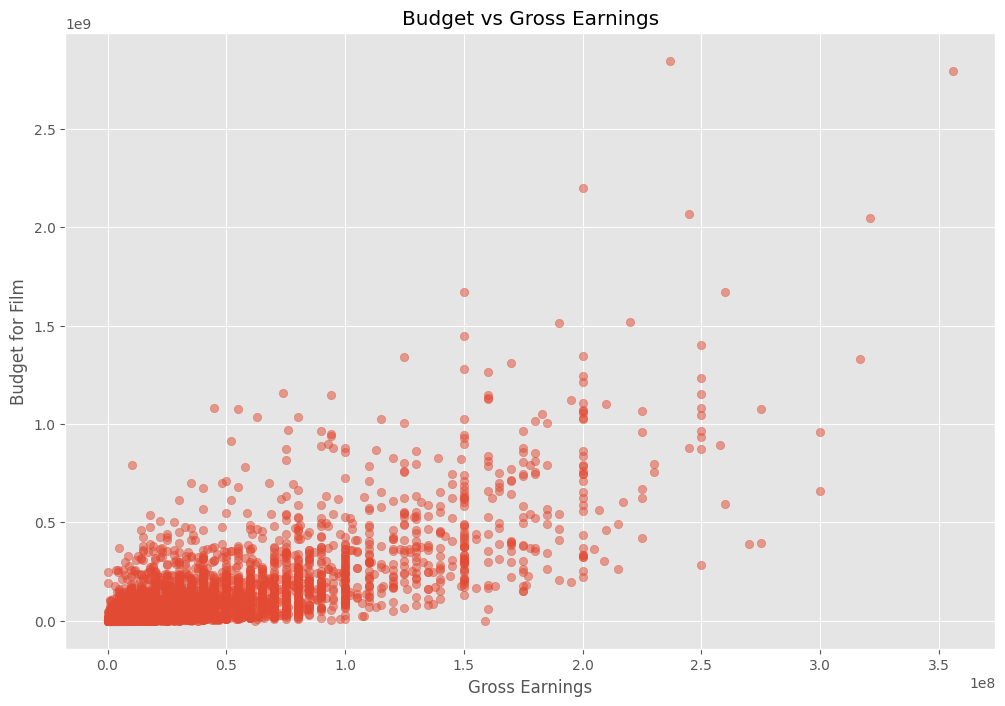

In [133]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [134]:
df_numerized = df


for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,country,score,votes,director,writer,star,budget,gross,company,runtime
5445,533,5,0,2009,55,7.8,1100000,1155,1778,2334,237000000,2847246203,2253,162
7445,535,5,0,2019,55,8.4,903000,162,743,2241,356000000,2797501328,1606,181
3045,6896,5,6,1997,55,7.8,1100000,1155,1778,1595,200000000,2201647264,2253,194
6663,5144,5,0,2015,55,7.8,876000,1125,2550,524,245000000,2069521700,1540,138
7244,536,5,0,2018,55,8.4,897000,162,743,2241,321000000,2048359754,1606,149
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,55,3.1,18,1500,2289,2421,7000,<NA>,-1,90
7664,1678,-1,4,2020,55,4.7,36,774,2614,1886,<NA>,<NA>,539,90
7665,4717,-1,6,2020,55,5.7,29,2061,2683,2040,58750,<NA>,941,<NA>
7666,2843,-1,6,2020,55,NaN,<NA>,1184,1824,450,15000,<NA>,-1,120


In [135]:
df_numerized.corr(method='pearson')

,name,rating,genre,year,country,score,votes,director,writer,star,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.010699,-0.010737,0.017097,0.013088,0.009079,0.009081,0.006472,0.023970,0.005533,0.009211,0.010392
rating,-0.008069,1.000000,0.072423,0.006741,0.081244,-0.001314,0.033225,0.019483,-0.005921,0.013405,-0.176002,-0.107339,-0.032943,0.062145
genre,0.016355,0.072423,1.000000,-0.077911,-0.037615,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.356564,-0.235650,-0.071067,-0.052711
year,0.010699,0.006741,-0.077911,1.000000,-0.080844,0.105994,0.218429,-0.020422,-0.008611,-0.027611,0.321918,0.250514,-0.015171,0.120636
country,-0.010737,0.081244,-0.037615,-0.080844,1.000000,-0.133348,0.073625,0.017490,0.015343,-0.012998,0.054063,0.092129,0.095548,-0.078412
score,0.017097,-0.001314,0.027965,0.105994,-0.133348,1.000000,0.409182,0.009559,0.019416,-0.001609,0.076254,0.186258,0.001030,0.399451
votes,0.013088,0.033225,-0.145307,0.218429,0.073625,0.409182,1.000000,0.000260,0.000892,-0.019282,0.442429,0.630757,0.133204,0.309212
director,0.009079,0.019483,-0.015258,-0.020422,0.017490,0.009559,0.000260,1.000000,0.299067,0.039234,-0.012272,-0.014441,0.004404,0.017624
writer,0.009081,-0.005921,0.006567,-0.008611,0.015343,0.019416,0.000892,0.299067,1.000000,0.027245,-0.039451,-0.023519,0.005646,-0.003511
star,0.006472,0.013405,-0.005477,-0.027611,-0.012998,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.019589,-0.002717,0.012442,0.010174


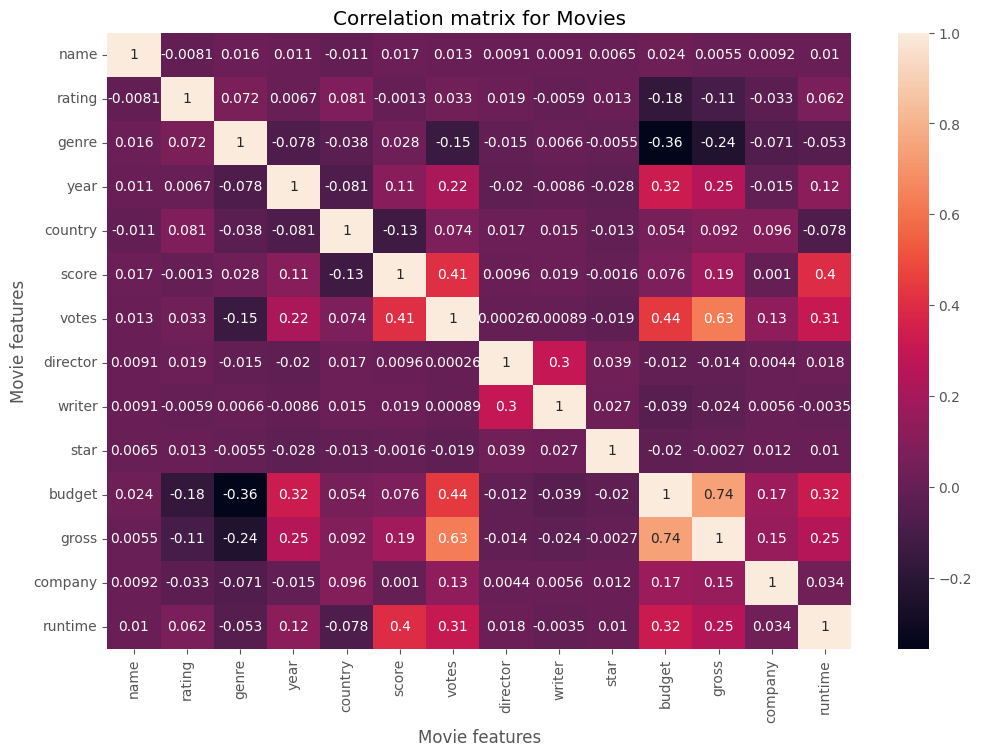

In [136]:
correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [137]:
df_numerized = df.copy()  # Create a copy of df to store the numerized version

for col_name in df.columns:
    if df[col_name].dtype == 'object':
        # Convert the column to categorical type
        df_numerized[col_name] = df[col_name].astype('category')
        # Assign the numerical codes to the new DataFrame
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head() 

,name,rating,genre,year,country,score,votes,director,writer,star,budget,gross,company,runtime
5445,533,5,0,2009,55,7.8,1100000,1155,1778,2334,237000000,2847246203,2253,162
7445,535,5,0,2019,55,8.4,903000,162,743,2241,356000000,2797501328,1606,181
3045,6896,5,6,1997,55,7.8,1100000,1155,1778,1595,200000000,2201647264,2253,194
6663,5144,5,0,2015,55,7.8,876000,1125,2550,524,245000000,2069521700,1540,138
7244,536,5,0,2018,55,8.4,897000,162,743,2241,321000000,2048359754,1606,149


<Axes: xlabel='rating', ylabel='gross'>

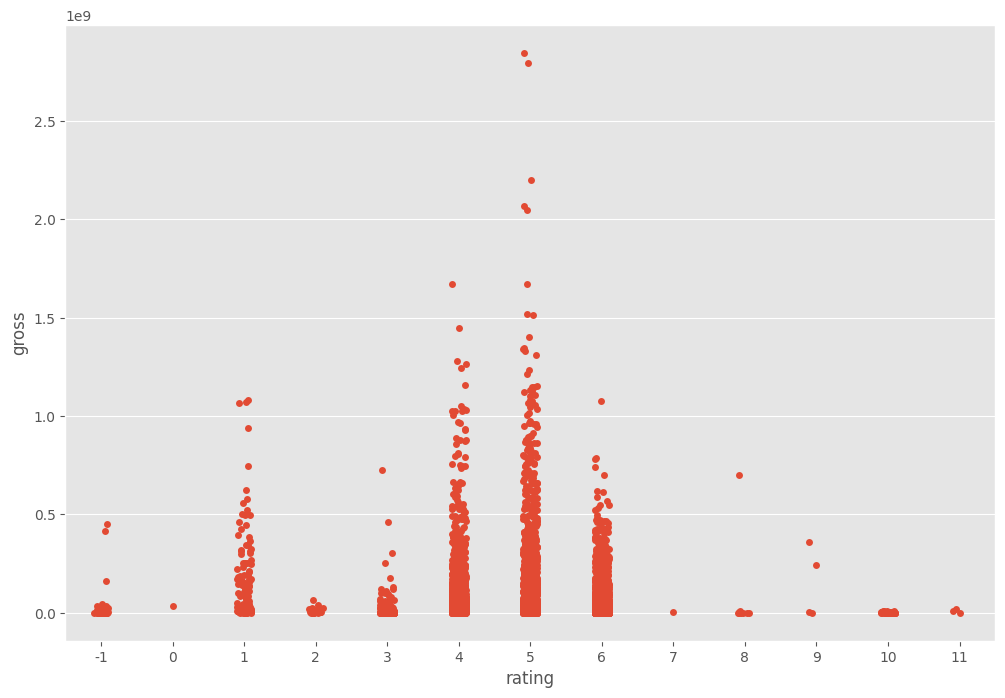

In [138]:

# df_numerized[col_name] = df_numerized[col_name].apply(lambda x: x.cat.codes )

# df_numerized
sns.stripplot(x="rating", y="gross", data=df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, '-1'),
  Text(1, 0, '0'),
  Text(2, 0, '1'),
  Text(3, 0, '2'),
  Text(4, 0, '3'),
  Text(5, 0, '4'),
  Text(6, 0, '5'),
  Text(7, 0, '6'),
  Text(8, 0, '7'),
  Text(9, 0, '8'),
  Text(10, 0, '9'),
  Text(11, 0, '10'),
  Text(12, 0, '11')])

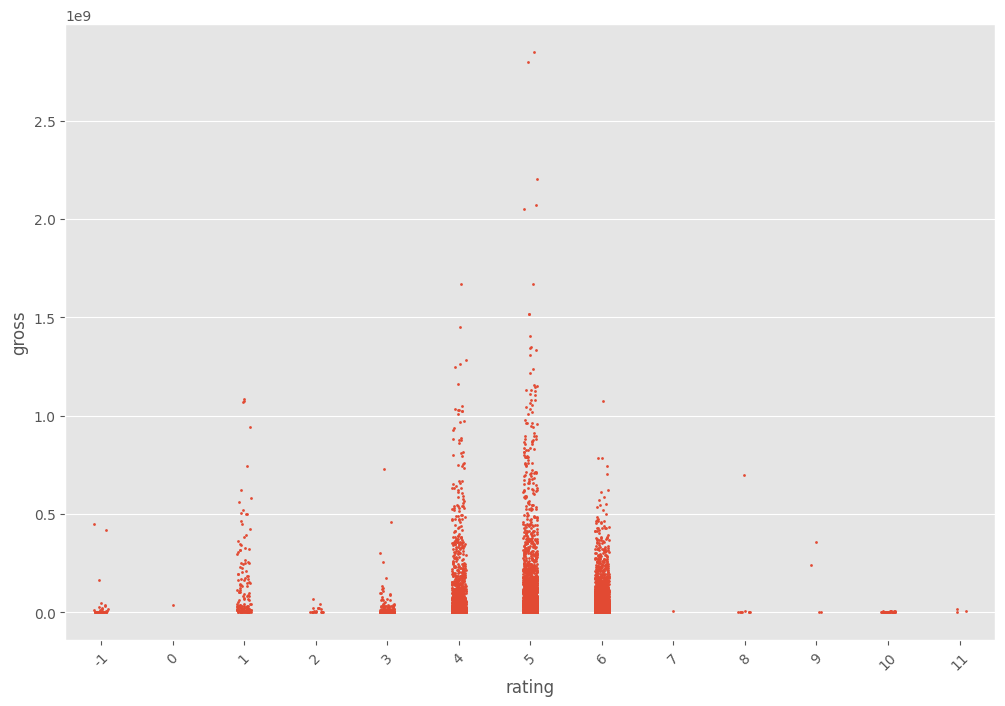

In [139]:
sns.stripplot(x="rating", y="gross", data=df, jitter=True, size=2) 
plt.xticks(rotation=45)  # Adjust rotation angle as needed


<Axes: xlabel='rating', ylabel='gross'>

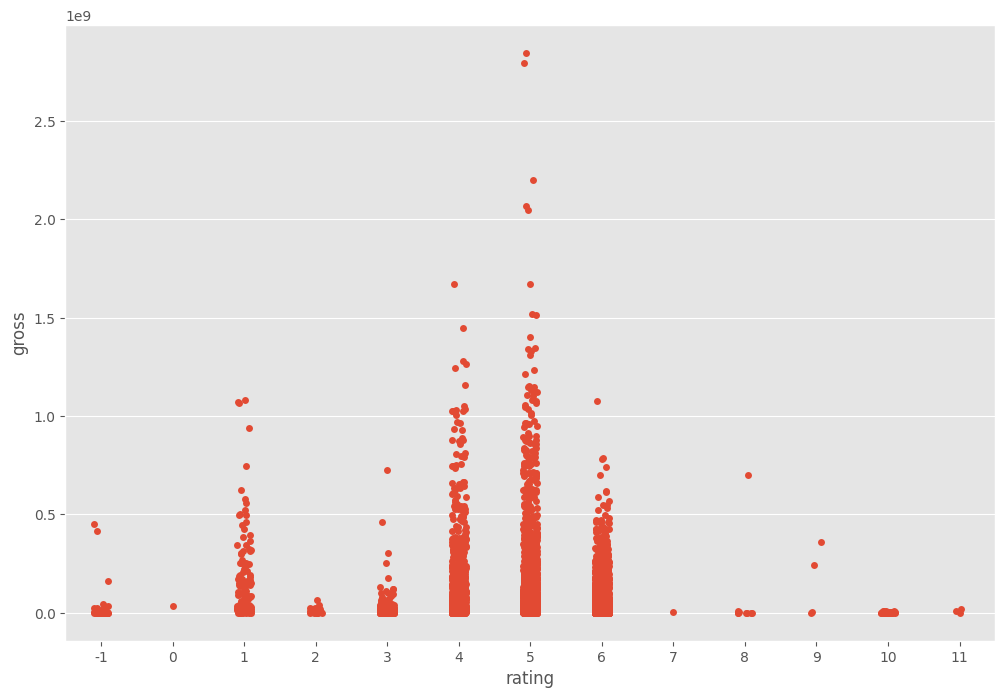

In [140]:
sns.stripplot(x="rating", y="gross", data=df_numerized)

## Fill Missing data with correlation

In [141]:


# Step 1: Calculate the correlation coefficient between 'budget' and 'gross' 
correlation = df['budget'].corr(df['gross'])

# Step 2: Fill missing values in 'budget' based on the correlation with 'gross'
# Filter rows where 'budget' is missing
missing_budget = df[df['budget'].isnull()]

# Calculate the corresponding 'budget' values based on the 'gross' values
missing_budget['budget'] = missing_budget['gross'] * correlation

# Step 3: Update the original dataframe with the filled values
# Replace missing values in the original dataframe with the calculated values
df.loc[missing_budget.index, 'budget'] = missing_budget['budget'].astype(df['budget'].dtype)

# Step 4: Check if there are still missing values in 'budget'

pct_missing = np.mean(df['budget'].isnull())

# Print the percentage of missing values
print('Percentage of missing values in "budget" after filling:', round(pct_missing*100, 2), '%')

Percentage of missing values in "budget" after filling: 1.67 %


## Pdf Report 

In [142]:
# # Add content pages with charts
# for chart_filename in chart_filenames:
#     pdf.add_page()
#     pdf.set_font('Arial', 'B', 16)
#     pdf.set_text_color(*font_color)
    
#     # Add the chart title
#     chart_title = os.path.basename(chart_filename).split(".")[0].replace("_", " ").title()
#     pdf.cell(0, 10, chart_title, ln=1)
    
#     # Add the chart description
#     pdf.set_font('Arial', '', 12)
#     pdf.set_xy(10, pdf.get_y() + 10)
    
#     description = ""
#     conclusion = ""
    
#     if chart_title == "Scatter Plot: Budget Vs. Gross Earnings":
#         description = "This scatter plot shows the relationship between the budget and gross earnings of movies."
#         conclusion = "The scatter plot reinforces the positive correlation between budget and gross earnings, with higher budget movies generally having higher gross revenues."
#     elif chart_title == "Correlation Heatmap":
#         description = "This heatmap displays the correlation matrix for all features of the movies dataset."
#         conclusion = "The correlation heatmap provides a comprehensive overview of the relationships between various features, highlighting positive and negative correlations."
#     elif chart_title == "Stripplot: Rating Vs. Gross Earnings":
#         description = "This stripplot visualization shows the relationship between movie ratings and gross earnings."
#         conclusion = "The stripplot visualization suggests that higher-rated movies may not necessarily have higher gross revenues, indicating a potential lack of correlation between rating and financial success."
    
#     if description:
#         pdf.multi_cell(0, 5, txt=f"<b>Description:</b> {description}", align='L')
    
#     # Add the chart image
#     pdf.image(chart_filename, x=10, y=pdf.get_y() + 10, w=pdf.w - 20, h=0)
    
#     # Add the chart conclusion
#     if conclusion:
#         pdf.set_xy(10, pdf.get_y() + 10)
#         pdf.multi_cell(0, 5, txt=f"<b>Conclusion:</b> {conclusion}", align='L')
    
#     # Add header and footer
#     pdf.ln(10)
#     pdf.set_font('Arial', 'I', 8)
#     pdf.set_text_color(128, 128, 128)
#     pdf.cell(0, 10, 'Movie Industry Analysis - Abderahmane Chabani', align='R')
#     pdf.ln(5)
#     pdf.cell(0, 10, str(pdf.page_no()), align='R')

# # Save the PDF document to a file on disk
# pdf.output(output_dir / "movie_analysis_report.pdf", "F")


## Correlation Analysis:

- There is a **strong positive correlation (0.68)** between the budget and gross revenue of movies. A positive correlation indicates that as one variable increases (in this case, the budget), the other variable (gross revenue) also tends to increase. This suggests that movies with higher budgets are more likely to generate higher gross revenues.

- The correlation matrix and heatmap show **moderate positive correlations** between gross revenue and other features like votes (0.44) and runtime (0.38). Positive correlations suggest that as one variable increases, the other variable also tends to increase.

- There are **negative correlations** between the rating and features like budget (**-0.11**), gross (**-0.12**), and runtime (**-0.15**). A negative correlation indicates that as one variable increases, the other variable tends to decrease. In this case, higher-rated movies may not necessarily have higher budgets, gross revenues, or longer runtimes.
